In [1]:
source('K2methods.r') |> suppressPackageStartupMessages()
library(bnstruct)     |> suppressPackageStartupMessages()
child <- read.csv('https://www.ccd.pitt.edu/wiki/images/CHILD10k.csv')

Warning message:
"il pacchetto 'bnlearn' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'bnstruct' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'igraph' è stato creato con R versione 4.2.3"


In [2]:
# Map the string values to integers values
column.mapping = function(column) {
  unique.values <- unique(column)
  mapped.table <- tibble(
      string.value = unique.values, 
      numeric.value = seq_along(unique.values)
  )
  mapped.column <- mapped.table$numeric.value[match(column, mapped.table$string.value)]
  return(mapped.column)
}

In [3]:
# convert the dataset into a series of integers
child.modified = child
child.modified <- child.modified %>% mutate(across(
    everything(), ~ column.mapping(.)))
head(child.modified)

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,2,1,2,2,1,2,2,2,2,2,1,1,1,2,2,2,1,1
3,1,1,2,1,3,1,2,2,1,2,3,2,1,1,2,2,2,1,2,1
4,1,1,1,1,2,2,1,1,1,1,2,3,2,1,1,2,3,2,3,1
5,1,1,1,1,3,1,1,1,1,2,3,4,1,2,1,1,1,1,1,2
6,1,1,1,1,1,1,1,1,2,2,4,4,2,2,1,1,3,1,1,2


In [4]:
# convertion into BNDataset
DF = BNDataset(data = child.modified, 
        discreteness = rep('d', ncol(child.modified)), 
        variables = names(child.modified), 
        node.sizes = apply(child.modified, 2, max), # max of each column
        starts.from = 1)

In [5]:
net = learn.network(DF, algo = 'mmhc')

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



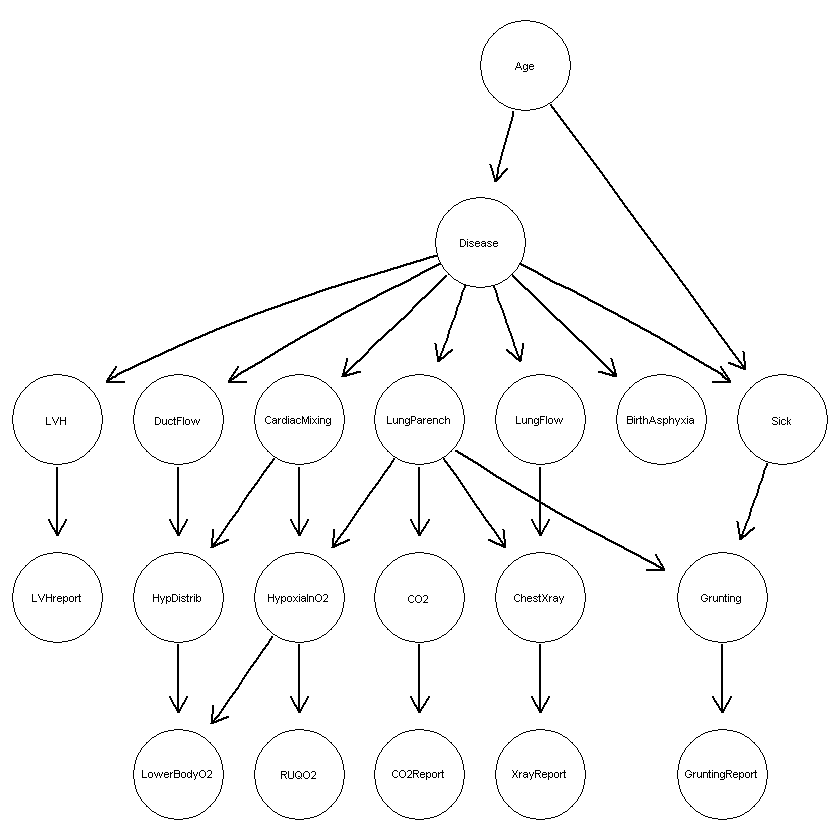

In [6]:
plot(net)

In [7]:
net_bnl = empty.graph(names(child.modified))
amat(net_bnl) = dag(net)

In [8]:
# convertion for bnlearn final analysis
for (i in 1:length(names(child.modified))) {
    name = names(child.modified)[i]
    child.modified[, name] = as.factor(as.character(child.modified[, name]))
}

In [9]:
score(net_bnl, data = child.modified, type = 'bic') # using DF is the same

[1] -123315.9